# Linear regression with one variable, implemented by numpy

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np

## LOAD DATASET 

In the following data
- X = number of claims
- Y = total payment for all the claims in thousands of Swedish Kronor

for geographical zones in Sweden Reference: Swedish Committee on Analysis of Risk Premium in Motor Insurance

dataset from -  http://college.cengage.com/mathematics/brase/understandable_statistics/7e/students/datasets/slr/frames/frame.html

In [2]:
df = pd.read_csv("data/slr06.csv")
df.head()

,X,Y
0,108,392.5
1,19,46.2
2,13,15.7
3,124,422.2
4,40,119.4


In [7]:
raw_X = df["X"].values.reshape(-1, 1)
y = df["Y"].values

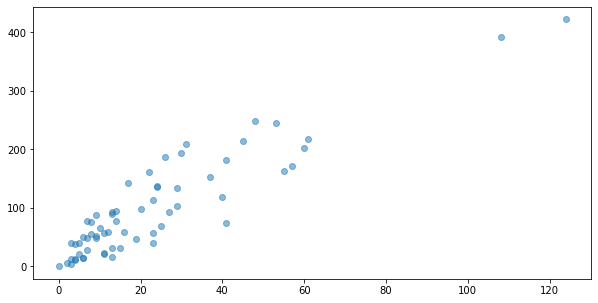

In [8]:
plt.figure(figsize=(10,5))
plt.plot(raw_X,y, 'o', alpha=0.5)

In [9]:
raw_X[:5], y[:5]

(array([[108],
        [ 19],
        [ 13],
        [124],
        [ 40]], dtype=int64),
 array([392.5,  46.2,  15.7, 422.2, 119.4]))

In [10]:
np.ones((len(raw_X),1))[:3]

array([[1.],
       [1.],
       [1.]])

In [11]:
X = np.concatenate( (np.ones((len(raw_X),1)), raw_X ), axis=1)
X[:5]

array([[  1., 108.],
       [  1.,  19.],
       [  1.,  13.],
       [  1., 124.],
       [  1.,  40.]])

In [12]:
w = np.random.normal((2,1)) 
# w = np.array([5,3])
w

array([1.58633594, 2.60347444])

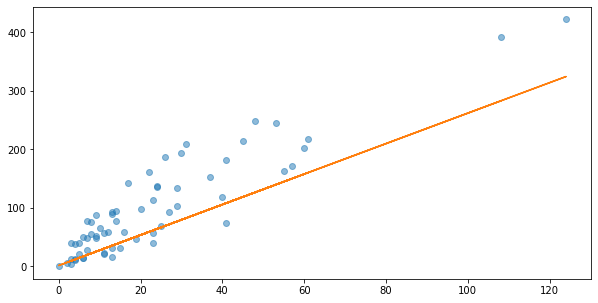

In [13]:
plt.figure(figsize=(10,5))
y_predict = np.dot(X, w)
plt.plot(raw_X,y,"o", alpha=0.5)
plt.plot(raw_X,y_predict)


## HYPOTHESIS AND COST FUNCTION

In [14]:
def hypothesis_function(X, theta):
    return X.dot(theta)

In [15]:
h = hypothesis_function(X,w)

In [16]:
def cost_function(h, y):
    return (1/(2*len(y))) * np.sum((h-y)**2)

In [17]:
h = hypothesis_function(X,w)
cost_function(h, y)

1484.9268860595114

## GRADIENT DESCENT

In [18]:
def gradient_descent(X, y, w, alpha, iterations):
    theta = w
    m = len(y)
    
    theta_list = [theta.tolist()]
    cost = cost_function(hypothesis_function(X, theta), y)
    cost_list = [cost]

    for i in range(iterations):
        t0 = theta[0] - (alpha / m) * np.sum(np.dot(X, theta) - y)
        t1 = theta[1] - (alpha / m) * np.sum((np.dot(X, theta) - y) * X[:,1])
        theta = np.array([t0, t1])
        
        if i % 10== 0:
            theta_list.append(theta.tolist())
            cost = cost_function(hypothesis_function(X, theta), y)
            cost_list.append(cost)


    return theta, theta_list, cost_list

## DO Linear regression with GD

In [19]:
iterations = 10000
alpha = 0.001

theta, theta_list, cost_list = gradient_descent(X, y, w, alpha, iterations)
cost = cost_function(hypothesis_function(X, theta), y)

print("theta:", theta)
print('cost:', cost_function(hypothesis_function(X, theta), y))

theta: [19.87732638  3.41635331]
cost: 625.374435167784


In [20]:
theta_list[:10]

[[1.586335940647805, 2.603474443635404],
 [1.6233049440378575, 3.885120673186808],
 [1.714345495666474, 3.8085351391386078],
 [1.8065292897479, 3.8065446724133274],
 [1.8982482158486236, 3.8045642432902307],
 [1.9895046182227676, 3.802593801151252],
 [2.0803008293027627, 3.800633295633643],
 [2.1706391697589575, 3.798682676628628],
 [2.260521948558937, 3.7967418942801205],
 [2.3499514630265335, 3.794810898983452]]

In [21]:
theta_list = np.array(theta_list)

In [22]:
cost_list[:5]

[1484.9268860595114,
 713.6720679138566,
 709.8587859934337,
 709.008817670658,
 708.1674002388694]

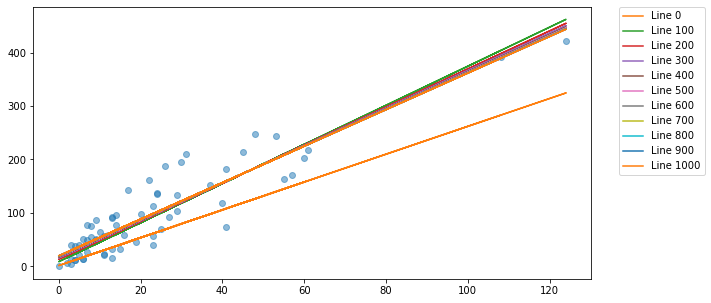

In [23]:
plt.figure(figsize=(10,5))

y_predict_step= np.dot(X, theta_list.transpose())

y_predict_step
plt.plot(raw_X,y,"o", alpha=0.5)
for i in range (0,len(cost_list),100):
    plt.plot(raw_X,y_predict_step[:,i], label='Line %d'%i)

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

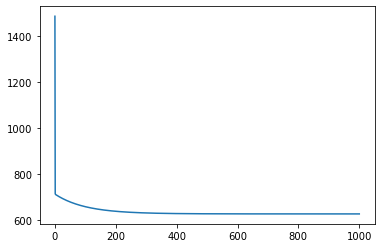

In [24]:
plt.plot(range(len(cost_list)), cost_list);


In [30]:
th0 = theta_list[:,0]
th1 = theta_list[:,1]
th0, th1

(array([ 1.58633594,  1.62330494,  1.7143455 , ..., 19.87559603,
        19.87619557, 19.87679209]),
 array([2.60347444, 3.88512067, 3.80853514, ..., 3.41639067, 3.41637773,
        3.41636485]))

In [28]:
TH0, TH1 = np.meshgrid(th0, th1)
TH0, TH1

(array([[ 1.58633594,  1.62330494,  1.7143455 , ..., 19.87559603,
         19.87619557, 19.87679209],
        [ 1.58633594,  1.62330494,  1.7143455 , ..., 19.87559603,
         19.87619557, 19.87679209],
        [ 1.58633594,  1.62330494,  1.7143455 , ..., 19.87559603,
         19.87619557, 19.87679209],
        ...,
        [ 1.58633594,  1.62330494,  1.7143455 , ..., 19.87559603,
         19.87619557, 19.87679209],
        [ 1.58633594,  1.62330494,  1.7143455 , ..., 19.87559603,
         19.87619557, 19.87679209],
        [ 1.58633594,  1.62330494,  1.7143455 , ..., 19.87559603,
         19.87619557, 19.87679209]]),
 array([[2.60347444, 2.60347444, 2.60347444, ..., 2.60347444, 2.60347444,
         2.60347444],
        [3.88512067, 3.88512067, 3.88512067, ..., 3.88512067, 3.88512067,
         3.88512067],
        [3.80853514, 3.80853514, 3.80853514, ..., 3.80853514, 3.80853514,
         3.80853514],
        ...,
        [3.41639067, 3.41639067, 3.41639067, ..., 3.41639067, 3.41639067

In [31]:
Js = np.array([cost_function(y, hypothesis_function(X, [th0, th1])) for th0, th1 in zip(np.ravel(TH0), np.ravel(TH1))])
Js = Js.reshape(TH0.shape)

<a list of 6 text.Text objects>

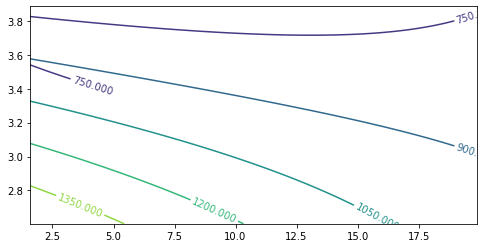

In [32]:
plt.figure(figsize=(8,4))
CS = plt.contour(TH0, TH1, Js)
plt.clabel(CS, inline=True, fontsize=10,inline_spacing=2)

In [33]:
from mpl_toolkits.mplot3d import Axes3D

ms = np.linspace(theta[0] - 15 , theta[0] + 15, 100)
bs = np.linspace(theta[1] - 15 , theta[1] + 15, 100)

M, B = np.meshgrid(ms, bs)

zs = np.array([ cost_function(y, hypothesis_function(X, theta))
    for theta in zip(np.ravel(M), np.ravel(B))])
Z = zs.reshape(M.shape)

<ipython-input-34-3b909e3cb67a>:5: UserWarning: The following kwargs were not used by contour: 'color'
  ax.contour(M, B, Z, 10, color='b', alpha=0.5, offset=0, stride=30)


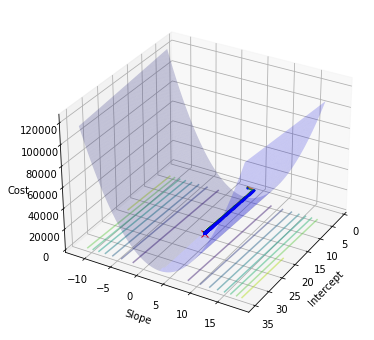

In [34]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(M, B, Z, rstride=1, cstride=1, color='b', alpha=0.2)
ax.contour(M, B, Z, 10, color='b', alpha=0.5, offset=0, stride=30)


ax.set_xlabel('Intercept')
ax.set_ylabel('Slope')
ax.set_zlabel('Cost') 
ax.view_init(elev=30., azim=30)
ax.plot([theta[0]], [theta[1]], [cost_list[-1]] , markerfacecolor='r', markeredgecolor='r', marker='x', markersize=7);

ax.plot(theta_list[:,0], theta_list[:,1], cost_list, markerfacecolor='g', markeredgecolor='g', marker='o', 
                markersize=1);
ax.plot(theta_list[:,0], theta_list[:,1], 0 , markerfacecolor='b', markeredgecolor='b', marker='.', markersize=2);